In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
features = pd.read_csv('all_uti_features.csv')
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116902 entries, 0 to 116901
Columns: 791 entries, example_id to uncomplicated
dtypes: float64(787), int64(4)
memory usage: 705.5 MB


In [3]:
features.head()

,example_id,demographics - age,demographics - is_white,demographics - is_veteran,micro - prev resistance LVX 14,micro - prev resistance AMP 14,micro - prev resistance CFZ 14,micro - prev resistance NIT 14,micro - prev resistance GEN 14,micro - prev resistance SXT 14,...,selected micro - colonization pressure NIT 90 - overall,selected micro - colonization pressure OXA 90 - overall,selected micro - colonization pressure PEN 90 - overall,selected micro - colonization pressure SAM 90 - overall,selected micro - colonization pressure SXT 90 - overall,selected micro - colonization pressure TET 90 - overall,selected micro - colonization pressure TZP 90 - overall,selected micro - colonization pressure VAN 90 - overall,is_train,uncomplicated
0,0,54,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.56,0.49,0.38,0.26,0.37,0.06,0.13,0,0
1,1,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.19,0.78,0.83,0.33,0.20,0.35,0.18,0.13,1,0
2,2,89,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.66,0.51,0.50,0.25,0.37,0.05,0.12,1,0
3,3,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.23,0.47,0.50,0.25,0.26,0.35,0.06,0.12,1,0
4,4,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.50,0.49,0.33,0.25,0.37,0.05,0.10,1,1


In [4]:
prescrip = pd.read_csv('all_prescriptions.csv')
prescrip.head()

,example_id,prescription,is_train
0,4,CIP,1
1,31,NIT,0
2,34,SXT,1
3,36,NIT,0
4,48,LVX,1


In [5]:
prescrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15806 entries, 0 to 15805
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   example_id    15806 non-null  int64 
 1   prescription  15806 non-null  object
 2   is_train      15806 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.6+ KB


In [6]:
resistance = pd.read_csv('all_uti_resist_labels.csv')
resistance.head()

,example_id,NIT,SXT,CIP,LVX,is_train,uncomplicated
0,0,0.0,0.0,0.0,0.0,0,0
1,1,0.0,0.0,0.0,0.0,1,0
2,2,0.0,0.0,1.0,1.0,1,0
3,3,0.0,0.0,0.0,0.0,1,0
4,4,0.0,0.0,0.0,0.0,1,1


In [7]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116902 entries, 0 to 116901
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   example_id     116902 non-null  int64  
 1   NIT            111859 non-null  float64
 2   SXT            103654 non-null  float64
 3   CIP            110761 non-null  float64
 4   LVX            115925 non-null  float64
 5   is_train       116902 non-null  int64  
 6   uncomplicated  116902 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 6.2 MB


In [8]:
#Example_id of patients who got NIT, SXT, CIP, LVX  prescribed prescribed
NIT = prescrip.where(prescrip.prescription == 'NIT')
NITdata=NIT.dropna()
lenNIT=len(NITdata)

SXT = prescrip.where(prescrip.prescription == 'SXT')
SXTdata=SXT.dropna()
lenSXT=len(SXTdata)

LVX = prescrip.where(prescrip.prescription == 'LVX')
LVXdata=LVX.dropna()
lenLVX = len(LVXdata)

CIP = prescrip.where(prescrip.prescription == 'CIP')
CIPdata=CIP.dropna()
lenCIP = len(CIPdata)

barprescription = [lenNIT, lenSXT, lenLVX, lenCIP]
print(barprescription)

[3250, 6183, 436, 5937]


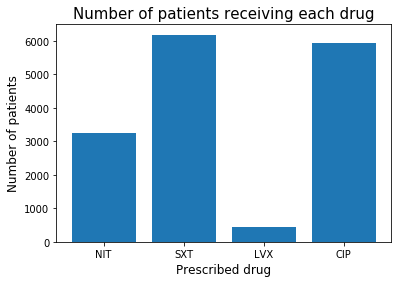

In [9]:
import matplotlib.pyplot as plt
import numpy as np
drug=['NIT','SXT','LVX','CIP']
pos = np.arange(len(drug))
numberofobs = barprescription
plt.bar(pos, numberofobs)
plt.xticks(pos, drug)
plt.xlabel('Prescribed drug', fontsize=12)
plt.ylabel('Number of patients', fontsize=12)
plt.title('Number of patients receiving each drug',fontsize=15)
plt.show()

In [10]:
#Create vector of example_id of patients who got SXT and CIT prescribed
exIDpreSXT = SXTdata['example_id'].dropna()
exIDpreCIP = CIPdata['example_id'].dropna()

In [11]:
#Example_id of patients where NIT, SXT, CIP, LVX  resistance data is available
# binary indicator of resistance (1 if resistant), if no result is available, the corresponding column is empty
# there are binary indicator for resistance for most of the samples, only few nan values, which are filtered out in this code snipped
NITres = resistance.dropna(subset = ['NIT'])
lenNITres=len(NITres)

#number of patients who are resistant to NIT
NITres2 = resistance.where(resistance.LVX == 1.0)
NITdata2=NITres2.dropna()
lenNITres2 = len(NITdata2)

SXTres = resistance.dropna(subset = ['SXT'])
lenSXTres=len(SXTres)

SXTres2 = resistance.where(resistance.SXT == 1.0)
SXTdata2=SXTres2.dropna()
lenSXTres2 = len(SXTdata2)

LVXres = resistance.dropna(subset = ['LVX'])
lenLVXres=len(LVXres)

LVXres2 = resistance.where(resistance.LVX == 1.0)
LVXdata2=LVXres2.dropna()
lenLVXres2 = len(LVXdata2)

CIPres = resistance.dropna(subset = ['CIP'])
lenCIPres=len(CIPres)

CIPres2 = resistance.where(resistance.CIP == 1.0)
CIPdata2=CIPres2.dropna()
lenCIPres2 = len(CIPdata2)

drug2=['NIT','NIT2','SXT','SXT2','LVX','NIT2','NIT2','CIP']
pos2 = np.arange(len(drug2))


In [12]:
df = pd.DataFrame({'Drug': ['NIT', 'SXT', 'LVX', 'CIP'],
                   'Resistance data available': [lenNITres, lenSXTres, lenLVXres, lenCIPres],
                   'Patient is resistant': [lenNITres2, lenSXTres2, lenLVXres2, lenCIPres2]})

#view DataFrame
df


,Drug,Resistance data available,Patient is resistant
0,NIT,111859,19743
1,SXT,103654,25005
2,LVX,115925,19743
3,CIP,110761,19783


Text(0.5, 1.0, 'Resistance data availability')

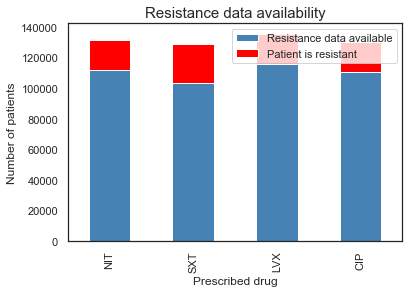

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
df.set_index('Drug').plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.xlabel('Prescribed drug', fontsize=12)
plt.ylabel('Number of patients', fontsize=12)
plt.title('Resistance data availability',fontsize=15)

In [14]:
#Create vector of example_id of patients where data for resistance on SXT and CIP is available
reIDpreSXT = SXTres['example_id'].dropna()
reIDpreCIP = CIPres['example_id'].dropna()

In [15]:
#ID_NIT are ID of all patients who received NIT and resistance value on NIT is available
ID_SXT = exIDpreSXT[exIDpreSXT.isin(reIDpreSXT)]
ID_CIT = exIDpreCIP[exIDpreCIP.isin(reIDpreCIP)]
numberofobs3 = [len(ID_SXT), len(ID_CIT)]
print(numberofobs3)

[6183, 5937]


In [16]:
#ID_NIT are ID of all patients who received NIT and resistance value on NIT is available
CVC = features['procedure 180 - had cvc'].where(features['procedure 180 - had cvc'] == 1).dropna()
surgery = features['procedure 180 - had surgery'].where(features['procedure 180 - had surgery'] == 1).dropna()
ventilation = features['procedure 180 - had mechanical ventilation'].where(features['procedure 180 - had mechanical ventilation'] == 1).dropna()
hemodia = features['procedure 180 - had hemodialysis'].where(features['procedure 180 - had hemodialysis']==1).dropna()
parentnutrition =  features['procedure 180 - had parenteral nutrition'].where(features['procedure 180 - had parenteral nutrition']==1).dropna()
lenCVC=len(CVC)
lensurg = len(surgery)
lenvent = len(ventilation)
lenhemodia=len(hemodia)
lennutri = len(parentnutrition)
print(lenCVC, lensurg, lenvent, lenhemodia)


10864 81363 10090 1516


In [17]:
CVCdata = CVC[CVC.isin(reIDpre)]
print(CVCdata)

NameError: name 'reIDpre' is not defined